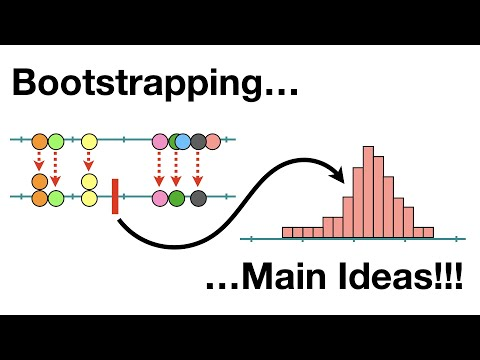

In [1]:
# Pre-lecture
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

In [ ]:
#1.
# Standard deviation: SD measures the amount of variation (or dispersion) of the individual data points from the mean in our original dataset.It tells us about how much the values in our sample differ from the sample mean.[A lower SD means they are closer to the mean.]
# Standard error of the mean: It measures the accuracy of the sample mean estimates the population mean.It tells us about how much the sample mean is expected to vary from sample to sample.[A smaller SEM means the sample mean has a precise estimate of the population mean. SEM=SD/suqr root(n)]
# Difference: SD describes the variability of individual data points in our sample; SEM descirbes the variability of the sample mean.(SD is about the spread of the data; SEM is about the precision of the sample mean.)

In [ ]:
#2.
# For a normal distribution, the critical value (Z-score) for 95% confidence interval is approximately 1.96 (standard errors above and below thr mean). Confidence Interval=(x-Z*SEM,x+Z*SEM).

In [ ]:
#3.
# First, generate many bootstrapped samples from our data by sampling with replacement, and compute the mean of each bootstrapped sample.
# Secondly, a 95% confidence interval captures the middle 95% of the distribution, which means excluding 2.5% from each tail.
# Why use np.quantile?
# It calculates arbitrary percentiles, which allow us to directly extract the lower and upper bounds of the confidence interval. (We don't need standard error and z-scores)
# How to use:
import numpy as np

# Suppose boot_means is an array of bootstrapped sample means
boot_means = [...]  # Bootstrapped means generated from your data

# Calculate the 95% confidence interval
lower_bound = np.quantile(boot_means, 0.025)
upper_bound = np.quantile(boot_means, 0.975)

# Print the confidence interval
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


In [ ]:
# Summary (Chatbot)
#In this session, we covered two key statistical topics related to bootstrapping and sample size:

#Creating a 95% Bootstrapped Confidence Interval:

#To form a 95% confidence interval using bootstrapped sample means, you can apply the percentile method. This involves generating a distribution of bootstrapped means and using the np.quantile() function to find the 2.5th and 97.5th percentiles, which represent the lower and upper bounds of the confidence interval. This method avoids using the standard deviation and standard error of the mean by relying purely on the bootstrapped distribution.
#Why Bootstrapped Sample Size Matches Original Sample Size:

#We explored how the variability of sample mean statistics depends on the sample size (
#𝑛
#n)—larger sample sizes reduce the variability (standard error). In bootstrapping, the resampled data must match the size of the original sample to accurately represent the uncertainty and variability in the data. Using a different sample size during bootstrapping would distort the confidence interval estimates, either inflating or underestimating the variability, leading to biased results.
#This session helped clarify the importance of maintaining the original sample size in bootstrapping and how to calculate confidence intervals directly from the bootstrapped data.

#Link:https://chatgpt.com/c/66fef1e9-ee40-800c-972e-9b72d015f68d

In [2]:
#4.
import numpy as np

# We generate a random sample which is 1000 data
np.random.seed(42)
sample = np.random.normal(loc=50, scale=10, size=1000)  

# Step 2: Define the number of bootstrap resamples and confidence level
n_iterations = 10000  # number of bootstrap iterations
n_size = len(sample)  # sample size
alpha = 0.05  # significance level for 95% confidence interval

# Step 3: Create a function to compute the statistic for bootstrap resamples (mean here)
def bootstrap_statistic(data, n_iterations, stat_func=np.mean):
    """
    Function to perform bootstrap sampling and compute the statistic.
    
    Parameters:
    data - original sample
    n_iterations - number of bootstrap resamples
    stat_func - function to compute the desired statistic (default is mean)
    
    Returns:
    bootstrapped statistics
    """
    bootstrap_stats = []
    for _ in range(n_iterations):
        resample = np.random.choice(data, size=n_size, replace=True)  # resample with replacement
        statistic = stat_func(resample)  # compute the statistic (mean by default)
        bootstrap_stats.append(statistic)
    return np.array(bootstrap_stats)

# Step 4: Compute the bootstrap statistics for the mean
bootstrap_means = bootstrap_statistic(sample, n_iterations)

# Step 5: Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 100 * (alpha / 2))
upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

# Step 6: Print the results
print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

# How to modify the code for other statistics:
# To calculate a bootstrap confidence interval for the median, simply change the stat_func argument to np.median

# Example: Calculating for the median
bootstrap_medians = bootstrap_statistic(sample, n_iterations, stat_func=np.median)
lower_bound_median = np.percentile(bootstrap_medians, 100 * (alpha / 2))
upper_bound_median = np.percentile(bootstrap_medians, 100 * (1 - alpha / 2))
print(f"95% Bootstrap Confidence Interval for the Median: ({lower_bound_median:.2f}, {upper_bound_median:.2f})")


95% Bootstrap Confidence Interval for the Mean: (49.59, 50.81)
95% Bootstrap Confidence Interval for the Median: (49.52, 50.94)


In [ ]:
#In this session, we discussed how to compute a 95% bootstrap confidence interval for a population mean using Python. I provided code that generates a random sample, performs bootstrap resampling, and calculates the confidence interval. The code was structured to be adaptable, allowing for easy modifications to compute confidence intervals for other statistics, such as the population median. I also explained how to change the function to calculate bootstrap confidence intervals for statistics like the median, variance, or other parameters.

#Link:https://chatgpt.com/c/66fef936-b298-800c-b952-c5d067349a45

In [ ]:
# Post-lecture
#5.
# Population Parameter: It is unknown (because it's usually impractical or impossible to measure every member of the population) but fixed which describes some characteristic of an entire population.
# Sample Statistic: It is a subset of the population (computed from the sample), and it is used to estimate the population parameter.
# We use confidence intervals to quantify the uncertainty in our estimate. The sample statistic is different with the population parameter which is varies from sample to sample. The confidence interval captures the variability in the sample statistic and indicates the precision of our estimate.

In [ ]:
# Summary (Chatbot)
#In this session, we discussed the importance of distinguishing between a population parameter and a sample statistic when dealing with confidence intervals. The key points were:

#Population parameters are fixed values that describe the entire population, but they are usually unknown.
#Sample statistics are calculated from sample data and are used to estimate population parameters.
#Confidence intervals provide a range of values that likely contain the true population parameter, accounting for the variability in sample statistics.
#The distinction is essential because confidence intervals quantify the uncertainty of using sample data to infer unknown population values.
#The overall discussion emphasized how confidence intervals rely on sample statistics to make inferences about population parameters.

#Link:https://chatgpt.com/c/66fefddb-3044-800c-8675-054e96678d35


In [ ]:
#6.
# (1)Take your original sample and create many new samples by randomly selecting data points from the original sample, with replacement. repeat this random resampling process hundreds or thousands of times to get many new "resampled" datasets. Then, you calculate the statistic you're interested in (like the mean or median) for each of these resamples.
# (2)When we don't have a large sample size or can't assume that our data follows a specific distribution. It can help us create confidence intervals and so on.(It can estimate the variability or uncertainty around a statistic)
# (3)We can resample from our originaal sample many times and create new samples, and for each resample, calculate its average. After repeating doing this, we'll have a distribution of averages based on our sample.Now, compare your hypothesized average to this distribution of averages. If your hypothesized average falls within the range of typical averages from the resampling (for example, within the 95% confidence interval), then it’s plausible. 

In [ ]:
#7.
# If the confidence interval includes zero, it means this "zero" is a plausible value for the true population mean based on our data.(which means the real effect of that drug could be no effect, so we can't confidently say there's a significant effect).
# We would reject the null hypothesis if our confidence interval doesn't include zero. Because this means zero won't be a plausible value for the true population parameter based on our data.

In [ ]:
#8. Report on Vaccine Effectiveness Analysis
# Problem Introduction: AliTech has developed a new vaccine aimed at improving the health of individuals who take it. This report analyzes the effectiveness of the vaccine by examining the changes in health scores of patients before and after vaccination. By applying statistical methods, we aim to determine whether there is a significant positive effect associated with the vaccine.
# Null Hypothesis of "no effect": In the context of this analysis, the null hypothesis (H₀) states that the vaccine has no effect on health scores. This means that the average change in health score for individuals receiving the vaccine is zero, implying that any observed changes are due to random chance rather than the vaccine itself. 
# We visualize the initial and final health scores of the patients, as well as the distribution of changes in health scores.
# Quantitative Analysis: The analysis uses bootstrapping to estimate the mean change in health scores and to construct a confidence interval for this mean. Bootstrapping is a resampling technique that allows us to assess the variability of a statistic (mean).
# The bootstrapping results were visualized in a histogram, demonstrating the distribution of means derived from resampling. The red dashed line indicates the original mean change in health scores, providing a visual reference against the bootstrapped distribution.
# Findings and Discussion:
# The analysis made an original mean change in health scores of approximately 3.20, with a 95% confidence interval ranging from 0.9 to 5.6. Since the confidence interval does not include zero, we have sufficient evidence to reject the null hypothesis (H₀) of "no effect." This indicates that the vaccine is likely effective in improving the health scores of individuals.
# The findings suggest that the vaccine has a positive effect on health scores, with the average improvement being statistically significant.
# Further considerations:
# it is important to consider the limitations of this study, including the small sample size and the need for further research to validate these findings across larger and more diverse populations. Additionally, examining other factors such as age, gender, and underlying health conditions may provide further insights into the effectiveness of the vaccine.

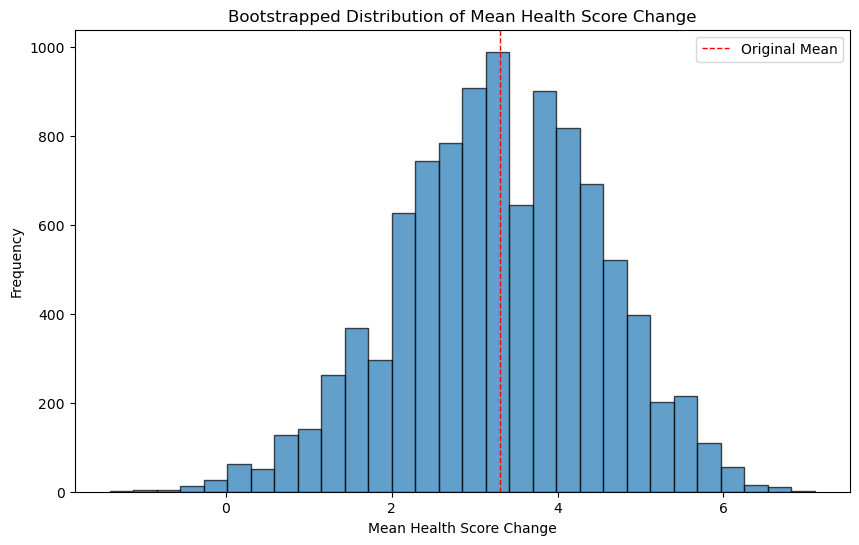

Original Mean Change in Health Score: 3.30
95% Confidence Interval: [0.8 5.5]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap parameters
n_iterations = 10000
bootstrap_means = []

# Bootstrapping
for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreChange'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

# Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrapped Distribution of Mean Health Score Change')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.axvline(np.mean(df['HealthScoreChange']), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()

# Output the original mean and the confidence interval
original_mean = np.mean(df['HealthScoreChange'])
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f'Original Mean Change in Health Score: {original_mean:.2f}')
print(f'95% Confidence Interval: {conf_interval}')


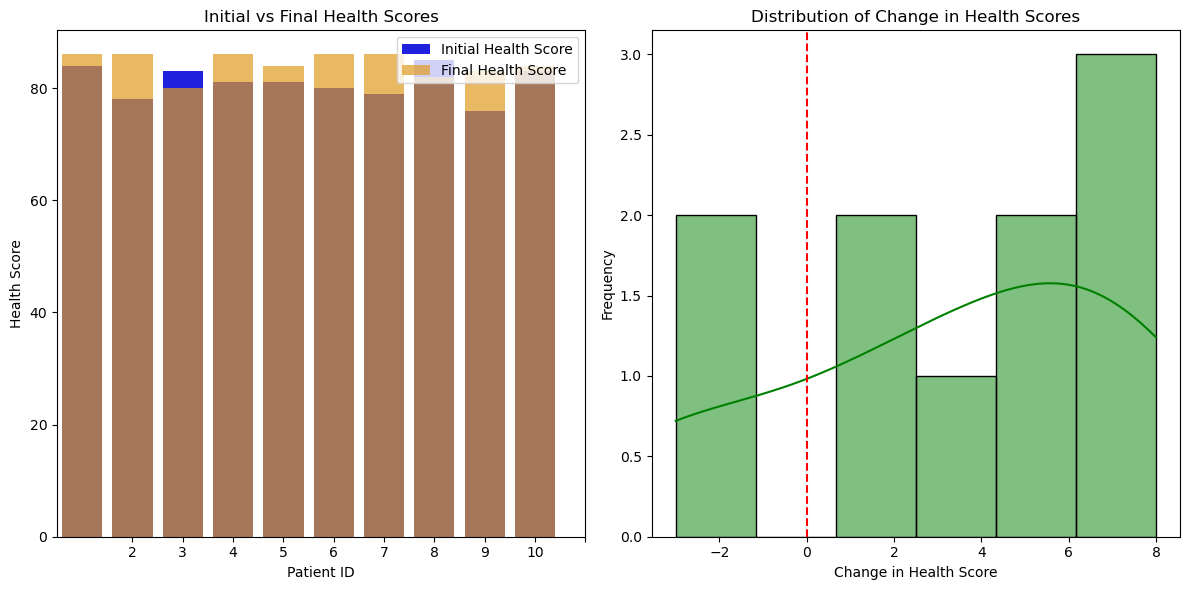

Bootstrapped Mean Change in Health Scores: 3.2915699999999997
95% Confidence Interval: (0.8, 5.5)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame from the provided data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the change in health score
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Visual Presentation
plt.figure(figsize=(12, 6))

# Plotting initial and final health scores
plt.subplot(1, 2, 1)
sns.barplot(x='PatientID', y='InitialHealthScore', data=df, color='blue', label='Initial Health Score')
sns.barplot(x='PatientID', y='FinalHealthScore', data=df, color='orange', label='Final Health Score', alpha=0.7)
plt.title('Initial vs Final Health Scores')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.xticks(df['PatientID'], rotation=0)
plt.legend()

# Plotting distribution of changes in health scores
plt.subplot(1, 2, 2)
sns.histplot(df['ChangeInHealthScore'], bins=6, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Change in Health Scores')
plt.xlabel('Change in Health Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bootstrapping to analyze effectiveness
def bootstrap_mean(data, n_iterations=10000):
    """Function to perform bootstrapping and return bootstrapped means."""
    bootstrapped_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))
    return bootstrapped_means

# Perform bootstrapping
change_data = df['ChangeInHealthScore'].values
bootstrapped_means = bootstrap_mean(change_data)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)
mean_of_changes = np.mean(bootstrapped_means)

print("Bootstrapped Mean Change in Health Scores:", mean_of_changes)
print("95% Confidence Interval:", (lower_bound, upper_bound))


In [ ]:
#9. Mostly